<a href="https://colab.research.google.com/github/szl10/Human_Activity_Recognition/blob/main/HAR_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# Obtain the Train and Test data

In [ ]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')
print(train.shape,test.shape)


(7352, 564) (2947, 564)


In [ ]:
train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [ ]:
X_train=train.drop(['subject','Activity','ActivityName'],axis=1)
Y_train=train['ActivityName']

In [ ]:
X_test=test.drop(['subject','Activity','ActivityName'],axis=1)
Y_test=test['ActivityName']

In [ ]:
print('X_train and y_train : ({},{})'.format(X_train.shape, Y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, Y_test.shape))

X_train and y_train : ((7352, 561),(7352,))
X_test  and y_test  : ((2947, 561),(2947,))


# Lets mModel our data
## Labels that are useful in plotting confusion Matrix

In [ ]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

## Functio to plot Confusion Matrix

In [ ]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion_Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=90)
    plt.yticks(tick_marks,labels)

    fmt='.2f' if normalize else 'd'
    thresh=cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, format(cm[i,j],fmt),horizontalalignment= 'center', color='white' if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Generic Function to Run any Model Specified

In [ ]:
from datetime import datetime
def perform_model(model, X_train, Y_train, X_test, Y_test, class_labels, cm_normalize=True, print_cm=True, cm_cmap=plt.cm.Greens):

    #to store results at various instances
    results=dict()

    #start time
    train_start_time=datetime.now()
    print('Training the model')
    model.fit(X_train,Y_train)
    print('Done\n\n')
    train_end_time=datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))

    #predicting test data
    test_start_time=datetime.now()
    print('predicting the data')
    Y_pred=model.predict(X_test)
    test_end_time=datetime.now()
    results['testing_time']=test_end_time-test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = Y_pred

    #accuracy score
    accuracy=accuracy_score(Y_test,Y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))

    #confusion matrix
    cm=confusion_matrix(Y_test,Y_pred)
    results['confusion_matrix'] = cm
    if print_cm:
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))

    #plotting confusion matrix
    plt.figure(figsize=(7,7))
    #plt.grid(b=False)
    plot_confusion_matrix(cm,classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()

    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    report = classification_report(Y_test, Y_pred)
    # store report in results
    results['classification_report'] = report
    print(report)

    # add the trained  model to the results
    results['model'] = model

    return results

## Function to print GridSearch Attributes

In [ ]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal number of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))


# 1. Logistic Regression with GridSearchCV

In [ ]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV


In [ ]:
import warnings
warnings.filterwarnings("ignore")


Training the model
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Done


training_time(HH:MM:SS.ms) - 0:00:25.109957


predicting the data
testing time(HH:MM:SS:ms) - 0:00:00.011598


---------------------
|      Accuracy      |
---------------------

    0.9582626399728538


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 431  57   0   0   3]
 [  0  16 516   0   0   0]
 [  0   0   0 492   3   1]
 [  0   0   0   4 403  13]
 [  0   0   0  24   2 445]]


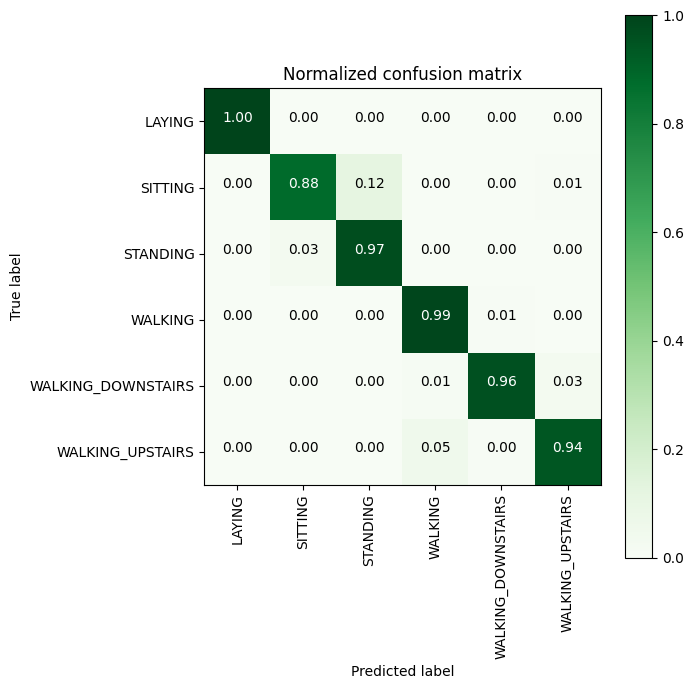

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.88      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.97       420
  WALKING_UPSTAIRS       0.96      0.94      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [ ]:
#start grid search
# Define the parameter grid
parameters = {'C': [0.01, 0.1, 1, 10, 20, 30], 'penalty': ['l2', 'l1']}

# Create a logistic regression model
#log_reg = linear_model.LogisticRegression()
log_reg = linear_model.LogisticRegression()


# Create a GridSearchCV object
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=1)

# Fit the grid search to your training data
log_reg_grid_results = perform_model(log_reg_grid, X_train, Y_train, X_test, Y_test, class_labels=labels)

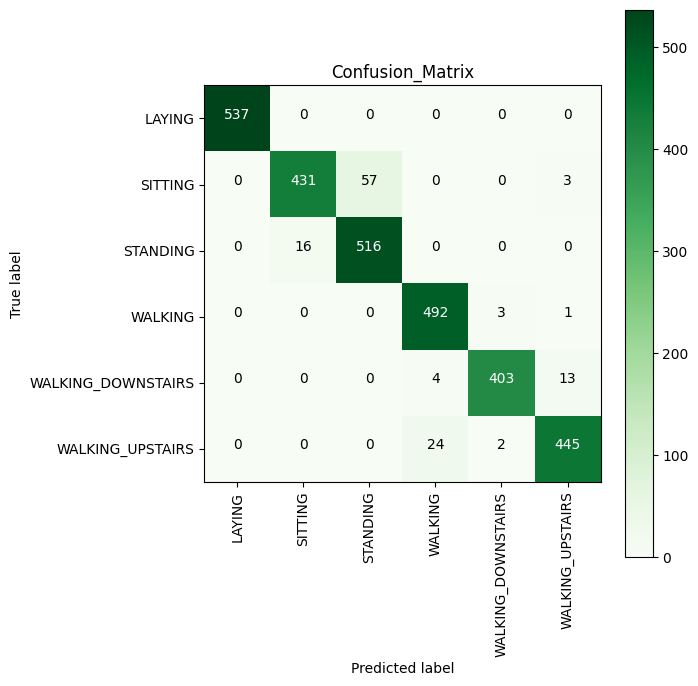

In [ ]:
plt.figure(figsize=(7,7))
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'],classes=labels,cmap=plt.cm.Greens)
plt.show()

In [ ]:
# observe the attributes of the model
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=1)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 1, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9378415584920218



# 2. Linear SVC with GridSearchCV

In [ ]:
from sklearn.svm import LinearSVC

Training the model
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Done


training_time(HH:MM:SS.ms) - 0:01:12.200122


predicting the data
testing time(HH:MM:SS:ms) - 0:00:00.008938


---------------------
|      Accuracy      |
---------------------

    0.9667458432304038


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 428  58   0   0   3]
 [  0   9 522   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   3 412   5]
 [  0   0   0  17   0 454]]


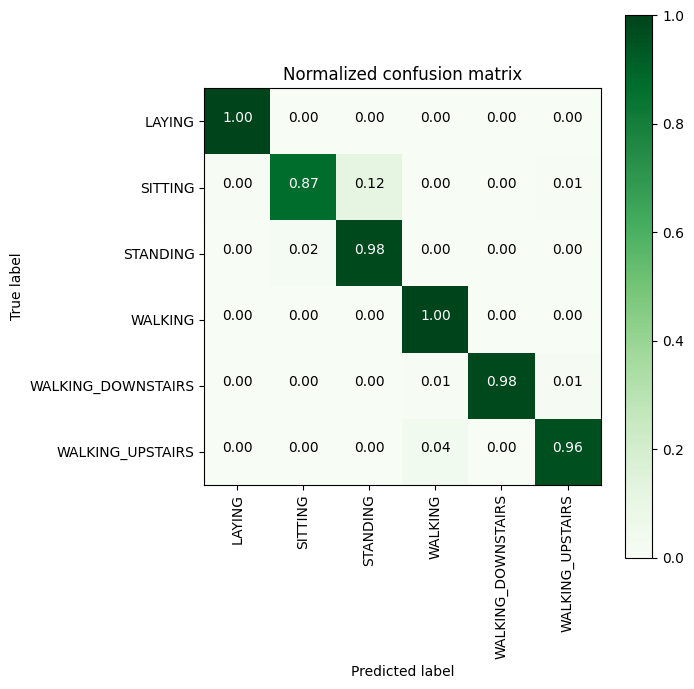

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



In [ ]:
parameters={'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc=LinearSVC(tol=0.00005)
lr_svc_grid=GridSearchCV(lr_svc,param_grid=parameters,n_jobs=-1,verbose=1)
lr_svc_grid_results=perform_model(lr_svc_grid,X_train, Y_train,X_test, Y_test,class_labels=labels)

In [ ]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=0.5, tol=5e-05)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 0.5}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9416565157674217



# 3. Kernel SVM with GridSearchCV

In [ ]:
from sklearn.svm import SVC

Training the model
Done


training_time(HH:MM:SS.ms) - 0:02:45.147961


predicting the data
testing time(HH:MM:SS:ms) - 0:00:01.751204


---------------------
|      Accuracy      |
---------------------

    0.9511367492365117


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 440  49   0   0   2]
 [  0  29 503   0   0   0]
 [  0   0   0 487   3   6]
 [  0   0   0  10 385  25]
 [  0   0   0  20   0 451]]


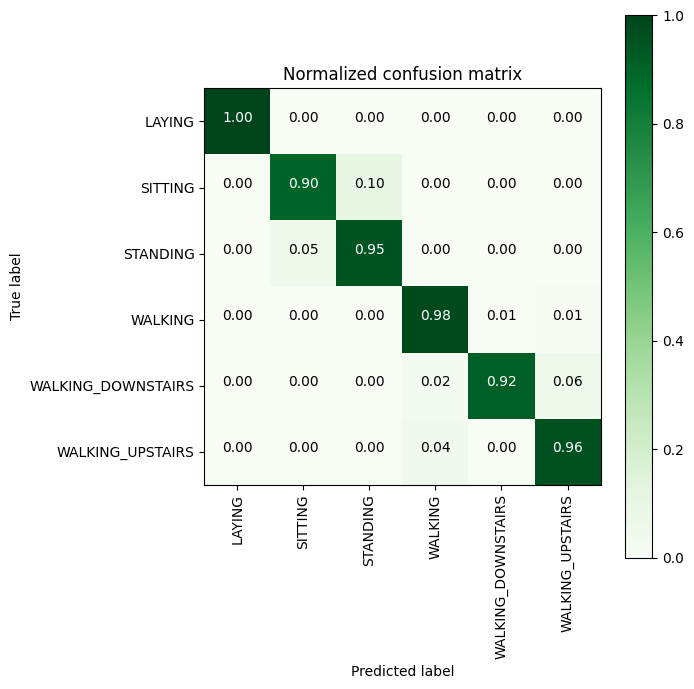

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.94      0.90      0.92       491
          STANDING       0.91      0.95      0.93       532
           WALKING       0.94      0.98      0.96       496
WALKING_DOWNSTAIRS       0.99      0.92      0.95       420
  WALKING_UPSTAIRS       0.93      0.96      0.94       471

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



In [ ]:
parameters={'C':[0.125, 0.5, 1], 'gamma':[0.0078125, 0.0625, 0.125]}
rbf_svm=SVC(kernel='rbf')
rbf_svm_grid=GridSearchCV(rbf_svm,param_grid=parameters,n_jobs=1)
rbf_svm_grid_results=perform_model(rbf_svm_grid,X_train,Y_train,X_test,Y_test,class_labels=labels)

In [ ]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=1, gamma=0.0078125)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 1, 'gamma': 0.0078125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9328127933702373



# 4. Decision Tree with GridSearchCV

Training the model
Done


training_time(HH:MM:SS.ms) - 0:00:28.310635


predicting the data
testing time(HH:MM:SS:ms) - 0:00:00.006047


---------------------
|      Accuracy      |
---------------------

    0.8720732948761453


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 376 115   0   0   0]
 [  0  61 471   0   0   0]
 [  0   0   0 469  18   9]
 [  0   0   0  22 352  46]
 [  0   0   0  67  39 365]]


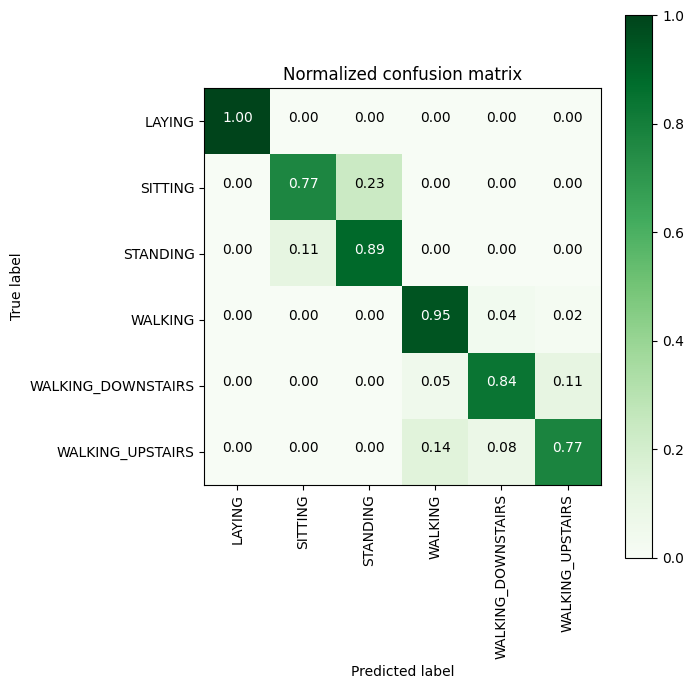

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.86      0.77      0.81       491
          STANDING       0.80      0.89      0.84       532
           WALKING       0.84      0.95      0.89       496
WALKING_DOWNSTAIRS       0.86      0.84      0.85       420
  WALKING_UPSTAIRS       0.87      0.77      0.82       471

          accuracy                           0.87      2947
         macro avg       0.87      0.87      0.87      2947
      weighted avg       0.87      0.87      0.87      2947

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(max_depth=9)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 9}

---------------------------------
|   No of CrossValidation sets

In [ ]:
from sklearn.tree import DecisionTreeClassifier
parameters={'max_depth': np.arange(3,10,2)}
dt=DecisionTreeClassifier()
dt_grid=GridSearchCV(dt,param_grid=parameters,n_jobs=-1)
dt_grid_results=perform_model(dt_grid,X_train,Y_train,X_test,Y_test,class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

In [ ]:
print_grid_search_attributes(dt_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(max_depth=9)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 9}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.8532476865661287



# 5. Random forest classifier with gridsearch

Training the model
Done


training_time(HH:MM:SS.ms) - 0:01:15.612454


predicting the data
testing time(HH:MM:SS:ms) - 0:00:00.035517


---------------------
|      Accuracy      |
---------------------

    0.9236511706820495


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 431  60   0   0   0]
 [  0  38 494   0   0   0]
 [  0   0   0 483  10   3]
 [  0   0   0  30 346  44]
 [  0   0   0  34   6 431]]


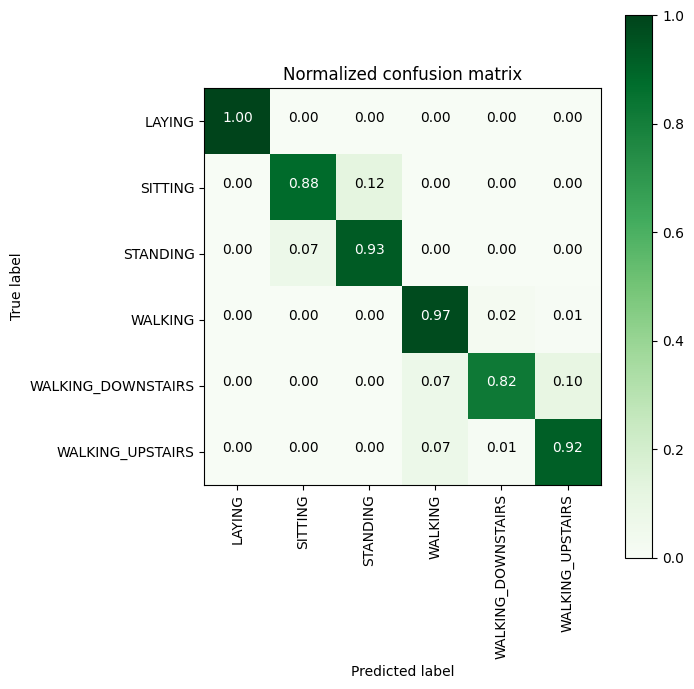

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.92      0.88      0.90       491
          STANDING       0.89      0.93      0.91       532
           WALKING       0.88      0.97      0.93       496
WALKING_DOWNSTAIRS       0.96      0.82      0.88       420
  WALKING_UPSTAIRS       0.90      0.92      0.91       471

          accuracy                           0.92      2947
         macro avg       0.93      0.92      0.92      2947
      weighted avg       0.93      0.92      0.92      2947

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(max_depth=9)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 9}

---------------------------------
|   No of CrossValidation sets

In [ ]:
from sklearn.ensemble import RandomForestClassifier
parameterss={'n_estimators':np.arange(10,201,20), 'max_depth': np.arange(3,15,2)}
rfc=RandomForestClassifier()
rfc_grid=GridSearchCV(rfc,param_grid=parameters, n_jobs=-1)
rfc_grid_esults=perform_model(rfc_grid,X_train,Y_train,X_test,Y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_esults['model'])

In [ ]:
print_grid_search_attributes(rfc_grid_esults['model'])

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(max_depth=9)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 9}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total number of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9168985881232168



# 6. XGBoost with Grid Search

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)


Training the model
Done


training_time(HH:MM:SS.ms) - 1:25:29.476983


predicting the data
testing time(HH:MM:SS:ms) - 0:00:00.036956


---------------------
|      Accuracy      |
---------------------

    0.9426535459789617


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 426  63   0   0   2]
 [  0  29 503   0   0   0]
 [  0   0   0 489   3   4]
 [  0   0   0   8 383  29]
 [  0   0   0  25   6 440]]


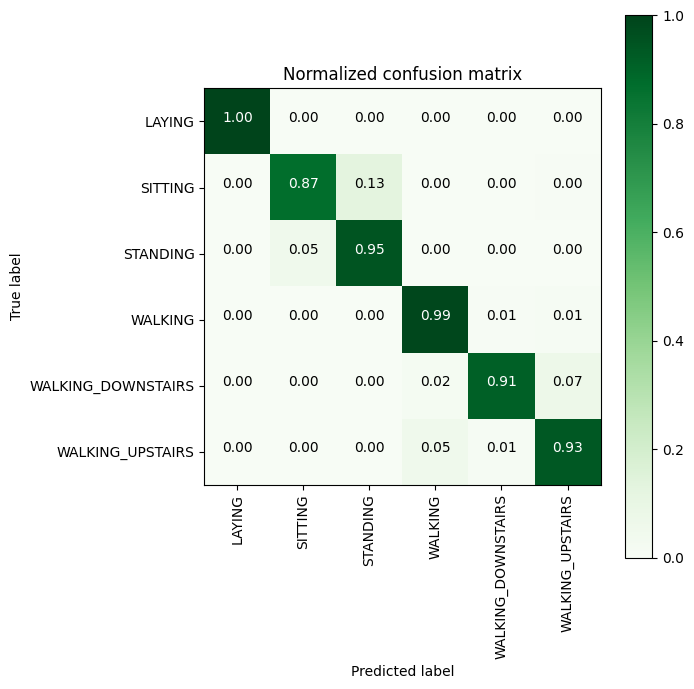

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.94      0.87      0.90       491
           2       0.89      0.95      0.92       532
           3       0.94      0.99      0.96       496
           4       0.98      0.91      0.94       420
           5       0.93      0.93      0.93       471

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947

--------------------------
|      Best Estimator     |
--------------------------

	XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_i

In [ ]:
from xgboost import XGBClassifier
parameters={'max_depth': np.arange(5,8,1),'n_estimators':np.arange(130,170,10)}
max_depth= np.arange(5,8,1)
n_estimators:np.arange(130,170,10)
xgbt=XGBClassifier()
xgbt_grid=GridSearchCV(xgbt,param_grid=parameters,n_jobs=-1)
xgbt_grid_results=perform_model(xgbt_grid,X_train,Y_train_encoded,X_test,Y_test_encoded,class_labels=labels)
print_grid_search_attributes(xgbt_grid_results['model'])

In [ ]:
print_grid_search_attributes(xgbt_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=160, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 5, 'n_estimators': 160}

-

#7. Gradient Boosted Decision Trees with Grid search

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
parameters={'max_depth':np.arange(5,8,1), 'n_estimators':np.arange(130,170,10)}
gbdt=GradientBoostingClassifier()
gbdt_grid=GridSearchCV(gbdt,param_grid=parameters,n_jobs=-1)
gbdt_grid_results=perform_model(gbdt_grid,X_train,Y_train,X_test,Y_test,class_labels=labels)
print_grid_search_attributes(gbdt_grid_results['model'])

Training the model


In [ ]:
print_grid_search_attributes(gbdt_grid_results['model'])

# 8. Comparing all the Models


In [ ]:
print('\n                      Accuracy        Error')
print('                       -----------    ----------')
print('Logistic Regression:    {:.04}%        {:.04}%'.format(log_reg_grid_results['accuracy']*100, 100-(log_reg_grid_results['accuracy']*100)))
print('Linear SVC:             {:.04}%        {:.04}%'.format(lr_svc_grid_results['accuracy']*100, 100-(lr_svc_grid_results['accuracy']*100)))
print('rbf SVM Classifier:     {:.04}%        {:.04}%'.format(rbf_svm_grid_results['accuracy']*100, 100-(rbf_svm_grid_results['accuracy']*100)))
print('Decision Tree:          {:.04}%        {:.04}%'.format(dt_grid_results['accuracy']*100, 100-(dt_grid_results['accuracy']*100)))
print('Random Forest:          {:.04}%        {:.04}%'.format(rfc_grid_esults['accuracy']*100, 100-(rfc_grid_esults['accuracy']*100)))
print('XGBoost:                {:.04}%        {:.04}%'.format(xgbt_grid_results['accuracy']*100, 100-(xgbt_grid_results['accuracy']*100)))
print('Gradient Boosted DT:    {:.04}%        {:.04}%'.format(gbdt_grid_results['accuracy']*100, 100-(gbdt_grid_results['accuracy']*100)))
